# Impact of Vegetation Structure on Snow Surface Temperature
## Main Objective: Integrating Lidar and Thermal Imaging Using a Tree Shadow Model 
<img src="Objective.PNG" width="500"/>



### Step 1. Tree Segmentation 
We were able to run pycrown to extract individual crowns using lidar point cloud data. 
We could not find .las data so far for Grand Mesa. We ran pycrown for the NEON -TEAK site for demonstration.  

#### Diaplay tree segmentation results 

In [34]:
#import necessary packages
import geopandas as gpd
import hvplot.pandas
import holoviews as hv

In [31]:
#read tree segmenation output 
dirin = '/home/jovyan/hot-pow/contributors/Wenge_Ni-Meister/data/TEAK/result/'
crown = gpd.read_file(dirin+'tree_crown_poly_raster.shp')
crown_smth = gpd.read_file(dirin+'tree_crown_poly_smooth.shp')
treeloc_corr = gpd.read_file(dirin+'tree_location_top_cor.shp')
treeloc = gpd.read_file(dirin+'tree_location_top.shp')

In [15]:
# Print out attributes in crown_smth 
crown_smth.head()

,DN,TTH,TCH,geometry
0,0,22.346436,22.216064,"POLYGON ((321459.190 4097383.046, 321458.294 4..."
1,1,27.966553,27.966553,"POLYGON ((321440.089 4097374.982, 321434.622 4..."
2,2,20.109863,20.109863,"POLYGON ((321423.687 4097371.998, 321411.599 4..."
3,3,30.339844,30.339844,"POLYGON ((321508.713 4097377.130, 321505.582 4..."
4,4,20.784668,20.784668,"POLYGON ((321524.736 4097369.046, 321523.907 4..."


<AxesSubplot:>

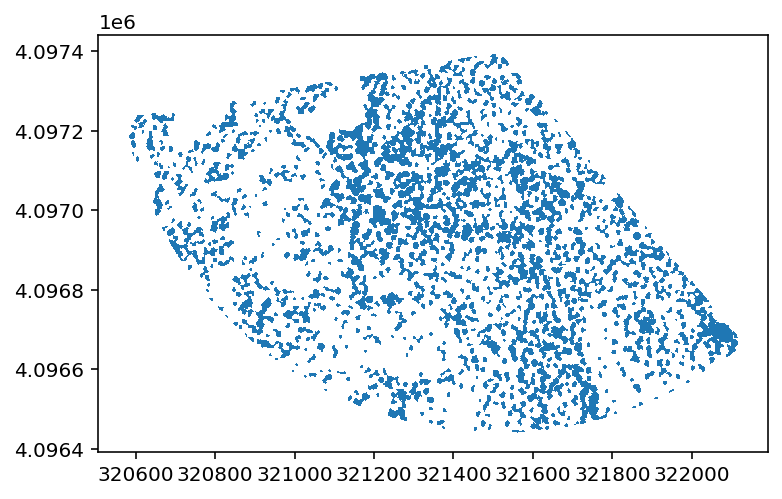

In [32]:
# display crown size using plot
crown.plot()

<AxesSubplot:>

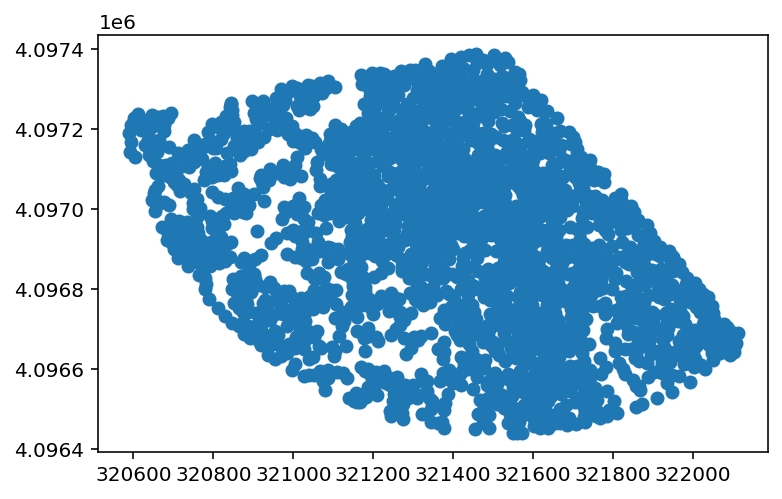

In [33]:
# display tree location information
treeloc.plot()

In [23]:
#display segmented crown size information
crown.hvplot()

:Polygons   [x,y]

In [24]:
# display tree location information 
treeloc.hvplot()

:Points   [x,y]

In [ ]:
# Use GPDL to display point cloud data (still learning) and overlay with segmented crowns  


#### Disply DSM, DTM and CHM images using rioxarray


In [39]:

# It's good practice to keep track of the versions of various packages you are using
import rioxarray
import xarray as xr
import rasterio
import numpy as np
import os

print('rioxarray version:', rioxarray.__version__)
print('xarray version:', xr.__version__)
print('rasterio version:', rasterio.__version__)

# Work in a temporary directory
#os.chdir('/tmp')

# Plotting setup
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
#plt.rcParams.update({'font.size': 16}) # make matplotlib font sizes bigger

rioxarray version: 0.4.3
xarray version: 0.18.2
rasterio version: 1.2.6


In [40]:
dirin = '/home/jovyan/hot-pow/contributors/Wenge_Ni-Meister/data/TEAK/'
# NOTE: This reads just the metadata into memory, not the whole file
path = dirin + 'chm_aoi_clean.tif'
with rasterio.open(path) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 1562, 'height': 960, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(1.0, 0.0, 320570.559,
       0.0, -1.0, 4097399.97), 'tiled': False, 'interleave': 'band'}


In [51]:
# set  nodata tp np.nan
#! gdal_edit.py -a_nodata np.nan path
#! gdal_edit.py -a_nodata -99999 path
#with rasterio.open(path) as src:
#    print(src.profile)

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/bin/gdal_edit.py", line 4, in <module>
    __import__('pkg_resources').run_script('GDAL==3.2.1', 'gdal_edit.py')
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/pkg_resources/__init__.py", line 665, in run_script
    self.require(requires)[0].run_script(script_name, ns)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/pkg_resources/__init__.py", line 1463, in run_script
    exec(code, namespace, namespace)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/GDAL-3.2.1-py3.8-linux-x86_64.egg-info/scripts/gdal_edit.py", line 11, in <module>
    sys.exit(main(sys.argv))
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/osgeo/utils/gdal_edit.py", line 424, in main
    return gdal_edit(argv)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/osgeo/utils/gdal_edit.py", line 135, in gdal_edit
    nodata = float(argv[i + 1])
ValueError: could not convert string to float: '

<class 'numpy.ndarray'>


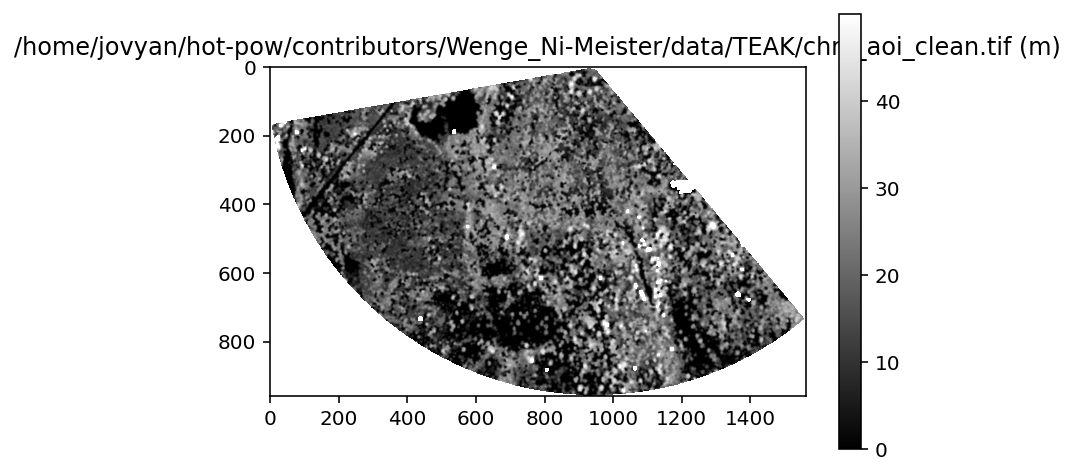

In [53]:
# We can read this raster data as a numpy array to perform calculations
with rasterio.open(path) as src:
    data = src.read(1) #read first band
    data[data==-3.4028234663852886e+38] = np.nan    
    data[data > 50] = np.nan    
    print(type(data))
    plt.imshow(data, cmap='gray')
    plt.colorbar()
    plt.title(f'{path} (m)')


In [57]:
# Rasterio has a convenience function for plotting with geospatial coordinates
#import rasterio.plot
#with rasterio.open(path) as src:
#    rasterio.plot.show(src)
   

## Step 2 - Run the tree shadow model and display tree shadows  

## Step 3 - Display thermal imageries 

## Step 4 - Compare tree shadow model outputs with thermal imageries 